# DEF-D Fysieke Ontwerpopdracht 1 invul template

## Groepsgegevens en planning 

Aan het einde van deze ontwerpopdracht lever je als groep dit notebook gezamenlijk in via een pull request op Github en lever je een link naar dit pull request in op Brightspace. Zet jullie studienummers en namen in onderstaande tabel zodat wij zeker weten dat het groepsvormen goed is gegaan. Werk in de juiste branch.

| Groep: 41     |  |
| :-------------|:-------------|
| Joppe van Duin | 6405835 |
| Luuc Leclercq| 6578136 |
| Aragon van Doesburg| 6394485 |

| Planning Groep: 41     |Tijdstip / Tijdspanne  |
|---|---|
| Mijlpaal 1: Criteria opgesteld | 12:45 |
| Mijlpaal 2: Eerste kalibratie meting gedaan| 15:00 |
| Pauze 1| 12:45 - 13:45 |
| Pauze 2| 15:00 - 15:30 |

## *Opdracht 1*: Foto van alle schetsen.

Zet de foto in dezelfde map als dit notebook en verander hieronder de naam in de naam van de foto.

![Alt](Dingemejig112.jpg "analyse: ideeen")

## *Opdracht 2*, MIJLPAAL, Leerdoel
Vul onderstaande tabel in en geef aan met welke sensor je verder gaat.** Laat dit aan je TA zien.** Als je TA druk is: ga wel ondertussen door met de volgende stap.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Druk sensor | Object wordt op druk sensor gelegd. Kracht wordt gemeten en omgezet tot massa. | Moet tegen 100 Newton kracht van boven aankunnen. Moet massa tussen 0-10 kg op 1 decimaal nauwkeurig kunnen meten.  |
|Druk sensor | Sensor wordt gebruikt als knop. Geeft aan wanneer ingedrukt met voldoende kracht. | Moet waardes hoger dan 5 newton kunnen decteren. Moet bij druk waardes tussen 0-5 Newton geen output geven als knop. |
|Druk sensor | Druk sensor wordt gebruikt om te bepalen hoeveel objecten over de druksensor heen rollen en van elk object het massa. | Moet waardes tussen 30 - 150 gram kunnen detecteren met een sensitiviteit van 5 gram. Moet een latentie laag genoeg hebben om meerdere objecten achter elkaar te bepalen, 50 ms of lager.  |
|Licht sensor | Meerdere lichtsensoren in de vorm van een halve bol worden gebruikt om een zonnepaneel constant in de richting van de zon te mikken. | Moet sensitief genoeg zijn om richting zon te bepalen. Sensitiviteit van 0.05 $W/m^2$ of lager. |
|Licht sensor | Licht sensor wordt gebruikt om de temperatuur van gloeilampen te bepalen gebaseerd op hun licht afgave. | Moet tegen temperaturen kunnen van 475K en lager. Moet een lichtintensiteit tussen de 0 en 2000 lumen kunnen meten. |
|Licht sensor | Bepalen van licht intensiteit in afgesloten omgeving | Moet een lichtintensiteit kunnen meten tussen 0-3000 lumen kunnen meten. |
|Temperatuur sensor | Gebruikt als thermometer voor bepalen drinkbaarheid thee. | Moet tegen temperaturen kunnen tussen de 0-100 graden celcius. Moet water bestendig zijn. Sensitiviteit van maximaal 3 graden celcius |
|Temperatuur sensor | Bepalen lichaamstemperatuur persoon om te  checken of een persoon koorts heeft.  | Moet tegen temperaturen kunnen tot 45 graden celcius. Moet een sensitiviteit hebben van 0.1 graden celcius of lager. Moet water bestendig zijn.  |
|Temperatuur sensor | Gebruikt om buiten temperatuur te bepalen.  | Moet tegen temperaturen van -20 - 40 graden celcius kunnen. Moet water bestendig zijn. Moet een sensitiviteit hebben van 1 graden celcius of lager.   |

Groep 41 heeft gekozen voor de druk sensor (optie 3).

## *Opdracht 3*: Foto van de schets van jouw meetopstelling in.
Dit figuur weergeeft onze meet opstelling. Deze bevat de druk sensor die het gewicht van verschillende balletjes meet terwijl deze er over heen rollen.
 ![Alt](Fotodingen2.jpg "schets student")

2e iteratie, een grotere weerstand is gebruikt. 
 ![Alt](figuurnogwat.jpg "schets student2")

## *Opdracht 4*: Beantwoord de vragen

1. Welke variabelen ga je veranderen? De massa van de objecten die over de druk meter worden gerold.
2. Over welk bereik ga je deze variabelen veranderen? Er wordt gemeten met meerdere massa's tussen  32.6 gram en 143.5 gram. 
3. Wat ga je allemaal meten? De massa van de objecten en de hoeveelheid balletjes die over de druk sensor worden gerold.
4. Hoeveel metingen ga je doen? 3 verschillende objecten van elk een eigen massa. Elk object wordt drie keer gewogen.
5. Ga je met deze keuzes kunnen evalueren of jouw sensor geschikt is voor de gekozen toepassingen? Ja


## *Opdracht 5*: Foto van jouw meetopstelling in. Leerdoel.
In deze meetopstelling is de opstelling te zien. Een baan is gemaakt om de ballen die over de weegschaal gerold worden recht te houden. Het gewicht van deze weegschalen wordt dan gemeten door de druk sensor.
 ![Alt](Fotodingen33.jpg "meetopstelling student")

Voor de kalibratie is een alternatieve opstelling gebruikt om accurater 1 gewicht tegelijk te meten
 ![Alt](figuurnognogwat.jpg "schets student")

## *Opdracht 6*: Meten en fitten, Leerdoel

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
# 0.007 (mini bal), 0.0326 (med bal), 0.09 (grote bal), 0.02097 (1 cilinder), 0.03276 (2 cilinders), 0.29379 - 0.5407 (Fles op kurk)

gewicht = np.array([0.0325, 0.09, 0.1197, 0.1226, 0.14357,0.29379,0.38881,0.5407])
num = np.array([210,410,470,480,520,670,770, 820])

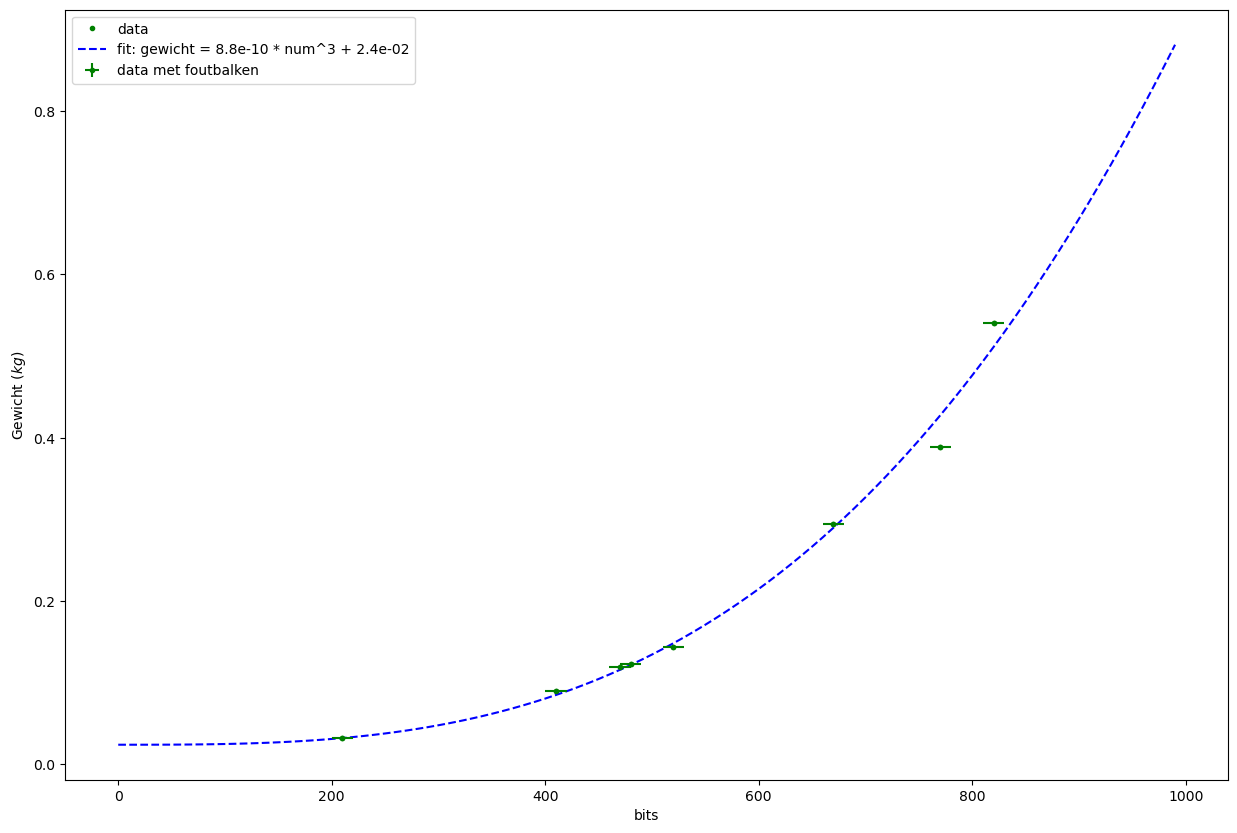

In [2]:
# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline

def func(x,a,b):
    return a* x**3 + b

param, cov = curve_fit(func, num, gewicht)

def func2(x,b,c):
    return b* x + c

param2, cov2 = curve_fit(func2, num, gewicht)
fitarray = np.arange(0,1000,10)

plt.figure(figsize=(15,10))
plt.plot(num, gewicht, 'g.', label='data')
plt.plot(fitarray, func(fitarray, *param), 'b--', label='fit: gewicht = %.1e * num^3 + %.1e' % (param[0], param[1]))
plt.errorbar(num, gewicht, yerr=0.001, xerr=10, fmt='g.', label='data met foutbalken')
plt.xlabel('bits')
plt.ylabel('Gewicht ($kg$)')
plt.legend()
plt.show()

## *Opdracht 7*: Iteratie nodig?

1 Iteratie is nodig met een hogere weerstand. De gegeven bit waardes waren te laag waardoor metingen onduidelijk waren bij de lage weerstand. Een hogere weerstand zal dit oplossen. 

Na de eerste iteratie is er geen verdere aanpassing nodig. Metingen binnen het bereik van 30-500 gram zijn met de nieuwe weerstand mogelijk en er is een duidelijk derde-machts verband aanwezig tussen de bits en het gewicht. 

## *Opdracht 8*: Conclusie, leerdoel

Uit de metingen volgt een derde-machts verband tussen de gemeten bits en het gewicht van de objecten. Dit is niet hetzelfde als onze verwachting wat een linear verband was. De druksensor opstelling functioneerd wel goed als een weegschaal en sensor voor objecten die er over heen rollen. Het bereik van de weegschaal functie valt tussen 30 gram en 1kg.
Lagere gewichten worden niet gedetecteerd en hogere gewichten wijken af van het derde-machts verband.

## *Opdracht 9*: Aantonen leerdoelen beheersing

Om aan te tonen dat je de leerdoelen beheerst, kopieer je hieronder alle cellen met 'leerdoel' in de titel. Zet zelf de cellen onder de goede kopjes. Mogelijk komt een cel bij meerdere leerdoelen terug.

### Leerdoel 1: Simpele circuits (RC-circuit, spanningsdelers met sensoren) ontwerpen en fabriceren.

In deze meetopstelling is de opstelling te zien. Een baan is gemaakt om de ballen die over de weegschaal gerold worden recht te houden. Het gewicht van deze weegschalen wordt dan gemeten door de druk sensor.
 ![Alt](Fotodingen33.jpg "meetopstelling student")

Voor de kalibratie is een alternatieve opstelling gebruikt om accurater 1 gewicht tegelijk te meten
 ![Alt](figuurnognogwat.jpg "schets student")

### Leerdoel 2: Ontwerpeisen voor een opdracht SMART opstellen en vervolgens de ontwerpcyclus inrichten, rekening houdend met de randvoorwaarde van de opdracht.

| Sensor | Toepassing | Criteria |
|:---|:---|:---|
|Druk sensor | Object wordt op druk sensor gelegd. Kracht wordt gemeten en omgezet tot massa. | Moet tegen 100 Newton kracht van boven aankunnen. Moet massa tussen 0-10 kg op 1 decimaal nauwkeurig kunnen meten.  |
|Druk sensor | Sensor wordt gebruikt als knop. Geeft aan wanneer ingedrukt met voldoende kracht. | Moet waardes hoger dan 5 newton kunnen decteren. Moet bij druk waardes tussen 0-5 Newton geen output geven als knop. |
|Druk sensor | Druk sensor wordt gebruikt om te bepalen hoeveel objecten over de druksensor heen rollen en van elk object het massa. | Moet waardes tussen 30 - 150 gram kunnen detecteren met een sensitiviteit van 5 gram. Moet een latentie laag genoeg hebben om meerdere objecten achter elkaar te bepalen, 50 ms of lager.  |
|Licht sensor | Meerdere lichtsensoren in de vorm van een halve bol worden gebruikt om een zonnepaneel constant in de richting van de zon te mikken. | Moet sensitief genoeg zijn om richting zon te bepalen. Sensitiviteit van 0.05 $W/m^2$ of lager. |
|Licht sensor | Licht sensor wordt gebruikt om de temperatuur van gloeilampen te bepalen gebaseerd op hun licht afgave. | Moet tegen temperaturen kunnen van 475K en lager. Moet een lichtintensiteit tussen de 0 en 2000 lumen kunnen meten. |
|Licht sensor | Bepalen van licht intensiteit in afgesloten omgeving | Moet een lichtintensiteit kunnen meten tussen 0-3000 lumen kunnen meten. |
|Temperatuur sensor | Gebruikt als thermometer voor bepalen drinkbaarheid thee. | Moet tegen temperaturen kunnen tussen de 0-100 graden celcius. Moet water bestendig zijn. Sensitiviteit van maximaal 3 graden celcius |
|Temperatuur sensor | Bepalen lichaamstemperatuur persoon om te  checken of een persoon koorts heeft.  | Moet tegen temperaturen kunnen tot 45 graden celcius. Moet een sensitiviteit hebben van 0.1 graden celcius of lager. Moet water bestendig zijn.  |
|Temperatuur sensor | Gebruikt om buiten temperatuur te bepalen.  | Moet tegen temperaturen van -20 - 40 graden celcius kunnen. Moet water bestendig zijn. Moet een sensitiviteit hebben van 1 graden celcius of lager.   |

Groep 41 heeft gekozen voor de druk sensor (optie 3).

### Leerdoel 3: Voor een gegeven sensor & analoog-digitaal convertor en gegeven (of zelf gekozen) toepassing een kalibratie meting ontwerpen, inclusief het circuit om de sensor aan te sluiten op de analoog-digitaal convertor, de opstelling bouwen, en meetresultaten verwerken en concluderen of de combinatie van sensor en analoog-digitaal conversie geschikt is voor de toepassing.

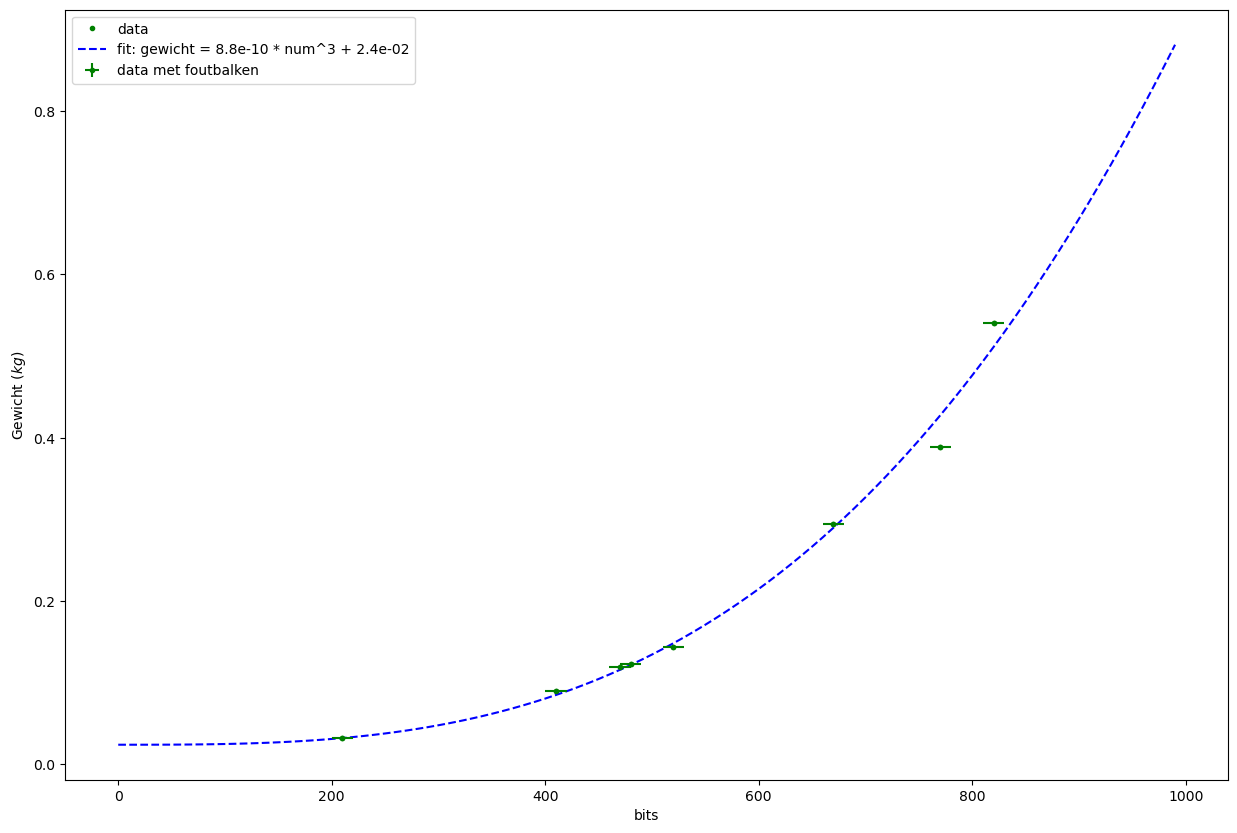

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
# 0.007 (mini bal), 0.0326 (med bal), 0.09 (grote bal), 0.02097 (1 cilinder), 0.03276 (2 cilinders), 0.29379 - 0.5407 (Fles op kurk)

gewicht = np.array([0.0325, 0.09, 0.1197, 0.1226, 0.14357,0.29379,0.38881,0.5407])
num = np.array([210,410,470,480,520,670,770, 820])

# Plot hier de meting en fit een lijn door de metingen.
# Maak gebruik van wat je geleerd hebt bij het practicum.
%matplotlib inline

def func(x,a,b):
    return a* x**3 + b

param, cov = curve_fit(func, num, gewicht)

def func2(x,b,c):
    return b* x + c

param2, cov2 = curve_fit(func2, num, gewicht)
fitarray = np.arange(0,1000,10)

plt.figure(figsize=(15,10))
plt.plot(num, gewicht, 'g.', label='data')
plt.plot(fitarray, func(fitarray, *param), 'b--', label='fit: gewicht = %.1e * num^3 + %.1e' % (param[0], param[1]))
plt.errorbar(num, gewicht, yerr=0.001, xerr=10, fmt='g.', label='data met foutbalken')
plt.xlabel('bits')
plt.ylabel('Gewicht ($kg$)')
plt.legend()
plt.show()

Uit de metingen volgt een derde-machts verband tussen de gemeten bits en het gewicht van de objecten. Dit is niet hetzelfde als onze verwachting wat een linear verband was. De druksensor opstelling functioneerd wel goed als een weegschaal en sensor voor objecten die er over heen rollen. Het bereik van de weegschaal functie valt tussen 30 gram en 1kg.
Lagere gewichten worden niet gedetecteerd en hogere gewichten wijken af van het derde-machts verband.